## Lets start with importing the neccessary libaries and neccessary functions

In [2]:
from numpy import *
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from numpy import genfromtxt
from mpl_toolkits.mplot3d import Axes3D
from os import path

 This function is used for computing mean_sqaured_error for provided weights and Biases.<br>

First step is to calculate the predictor value $\overline y$ from weight $m$ and bias $b$.
$$ \overline y = (m * x ) +b $$
and then calculate `mean squared loss` $mse$ from $ \overline y$ and number of samples $N$.
$$ mse = (\frac{1}{N})(y-\overline y)^2 $$
so our goal here is to minimize $mse$ so that predictor value $\overline y$ ,so that close to $y$.
<div class="alert alert-block alert-info">
This code below computes the error of the weights w & bias b
</div>

In [3]:

def compute_error(data,m,b):
        total_error=0
        N=float(len(data))
        for i in range(len(data)):
                [x,y]=data[i]
                y_ = (m * x ) + b
                total_error += (y-y_)** 2
        return ((1/N)*total_error) 


`step_gradient_descent` performs gradient-descent operation that is finding partial deriavatives of weights m and bias b.<br>

Partial Derivatives of loss function with respect to weight m and bias b :

$$
\begin{align}
w_\theta &= - \frac{2}{N} ( x * (y - (m*x+b ) ) )  \qquad \text{where,} \space \overline y = (m * x + b)  \\
b_\theta &= - \frac{2}{N} (y - (m*x+b) ) \\
\end{align}
$$

In [5]:

def step_gradient_descent(data,m,b,learning_rate=0.0001):
        b_gradient= m_gradient = 0
        N=float(len(data))
        for i in range(len(data)):
                [x,y]=data[i]
                y_=(m*x)+b
                m_gradient+= - (2/N)*(x*(y-y_))
                b_gradient+= -(2/N)*(y-y_)
        #print("m ={}, b ={}".format(m_gradient,b_gradient))
        m_new = m-(learning_rate*m_gradient)
        b_new = b-(learning_rate*b_gradient)
        return (m_new,b_new)

`plot()` is utility function that lets visualize the X ,Y plots and also plot the `line-of-best-fit`

In [6]:
def plot(data,m , b):
        x=np.array(data[:,0])
        y=np.array(data[:,1])
        m=float(format(m,'.4g')[:3])
        b=float(format(b,'.4g')[:3])
        #print(format(m,'.2g'),float(format(b,'.4g')[:4]))
        #print(m,b)
        #y_=[ b+(m*y_s) for y_s in y]
        y_ = (m*x)+b
        #print(y_)
        fig=plt.figure()
        ax=fig.add_subplot(111)
        #print(data[0],data[1])
        #print(data[:,0],data[:,1])
        ax.scatter(x,y,c='red',label="points (x,y)")
        ax.plot(x,y_,label="line of best fit")
        ax.legend(loc='upper center')
        plt.title('Regression Line')
        plt.savefig(fname="fig_1.png")
        plt.show()

`plot_3d()` Utility function to find the minima value in the valley.

In [7]:
def plot_3d(error,m,b):
        fig=plt.figure()
        #ax = fig.gca(projection='3d')
        ax=fig.add_subplot(111,projection='3d')
        ax.scatter(m,b,error,c="r",label='valley')
        
        ax.set_xlabel('weight')
        ax.set_ylabel('bias')
        ax.set_zlabel('Error(w,b)')
        
        ax.legend(loc='upper right')
        plt.title('Finding Minima')
        plt.show()

`plot_valley` is a utilify function that plots the error values which forms a bowl shape.<br>

In [8]:
def plot_valley(data,m,b):
    theta1 = np.linspace(m-5,m+5,100)
    theta2 = np.linspace(b-5,b+5,100)
    print(m,b)
    #print(theta1)
    #print(theta2)
    error_values = np.zeros((theta1.shape[0] , theta2.shape[0]))
    
    for i , i_value in enumerate(theta1):
        for j , j_value in enumerate(theta2):
            error_values[i,j] = compute_error( data,i_value,j_value )
    
    error_values = error_values.T
    #print( error_values.shape )
    # surface plot
    fig = plt.figure(figsize=(12, 5))
    ax = fig.add_subplot(121, projection='3d')
    ax.plot_surface( theta1 , theta2 , error_values , cmap='viridis')
    ax.scatter(m,b,c="r",label="$our \theta value$")
    plt.xlabel('theta0')
    plt.ylabel('theta1')
    ax.legend(loc='upper right')
    plt.title('Surface')
    
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(122)
    ax.contour( theta1 , theta2 , error_values , linewidths=2, cmap='viridis', levels=np.logspace(1,4.5,10) )
    ax.scatter(m,b,c='r',label='global minima')
    plt.xlabel('$\theta_0$')
    plt.ylabel('$\theta_1$')
    ax.legend()
    plt.title('Contour & minima')
    

`featureNormalize` is a utilify function that normalizes the features $x$ : <br>
$$
\begin{align}
x_{norm} &= \frac{( x - mean )}{std} 
\end{align}
$$

In [9]:
def featureNormalize(X):
    
    mean = np.mean(X , axis=0 )
    std = np.std(X , axis=0 )
    print('mean ',mean)
    print('std',std)
    norm = ( X - mean ) / std
    return norm

`perform_gradient_descent` that performs gradient descent on the dataset , returns the best weight $m$ and bias $b$

In [10]:
def perform_gradient_descent(data,m,b,lr=0.0001,epochs=1000):
        m_array=b_array=[]
        for i in range(epochs):
                if(i % 100 == 0 ):
                        print("Running {}/{}".format(i,epochs))
                (m,b) = step_gradient_descent(data,m,b,lr)
                m_array.append(m)
                b_array.append(b)
        #np.array(m_array),np.array(b_array)

        plot(data,m,b)

        return (m,b,m_array,b_array)
 

let's the run the `batch-gradient-descent-runner` so that we can perform step-gradient-descent on very points in Data for `1000 epochs` and `learning_rate of 0.001`

Running
Error @ inital stage : 5565.107834483212
Running 0/1000
Running 100/1000
Running 200/1000
Running 300/1000
Running 400/1000
Running 500/1000
Running 600/1000
Running 700/1000
Running 800/1000
Running 900/1000


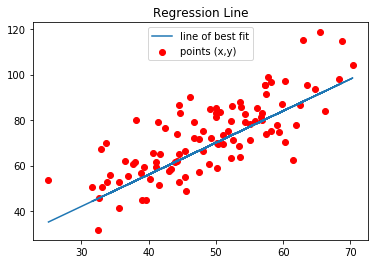

1.4777440851894448 0.08893651993741344
Error after Performing Gradient Descent : 112.61481011613475


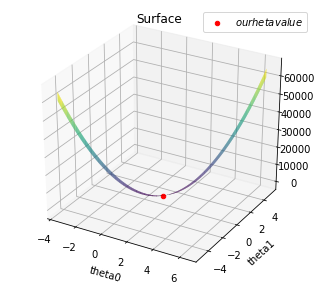

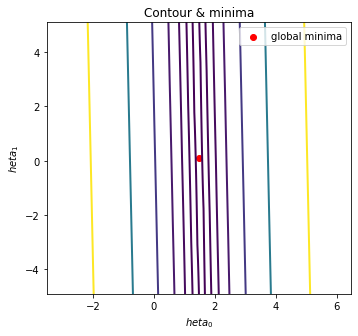

In [11]:

               
def run():
        print('Running')
        data = genfromtxt(path.join('data.csv'),delimiter=',')
        initial_m = 0
        initial_b = 0
        error=compute_error(data,initial_m,initial_b)
        print("Error @ inital stage : {}".format(error))
        (m,b,m_array,b_array)=perform_gradient_descent(data,initial_m,initial_b)
        #print('gradient ',m,b)
        N=len(m_array)
        e_array=[]

        for i in range(N):
                e_array.append(compute_error(data,m_array[i],b_array[i]))
        #X = data[:,0]
        #x_norm = featureNormalize(data)
        
        #print('normalized ',x_norm)
        
        plot_valley(data,m,b)
        #plot_3d(e_array,m_array,b_array)
        error=compute_error(data,m,b)
        print("Error after Performing Gradient Descent : {}".format(error))
        
run()

###  Regularization:
There are two Regularization methods :
 - L2 Norm : sumation of `absolute values` of the vector ( $ \sum_{i=1}^n \theta_i^2 $ )
 - L1 Norm : sumation of `squared root of squared values` of the vector ( $ \sum_{i=1}^n | \theta_i | $ )
 
we'll use `L2 Norm` as our regulization method
$$
\begin{align}
w_\theta &= - \frac{2}{N} \left( x * \left(y - \left(m*x+b\right) \right) \right) +  \frac{\lambda}{2m} \sum_{i=1}^n \theta_i^2   \\
b_\theta &= - \frac{2}{N} \left(y - \left(m*x+b\right) \right) + \frac{\lambda}{2m} \sum_{i=1}^n \theta_i^2  \\
\end{align}
$$


In [27]:
def step_gradient_descent_reg(data,m,b,learning_rate=0.0001,_lambda=1):
        b_gradient= m_gradient = 0
        N=float(len(data))
        for i in range(len(data)):
                [x,y]=data[i]
                y_=(m*x)+b
                m_gradient+= - ( (2/N)*(x*(y-y_)) ) + ( (_lambda / 2 * m ) * (np.sum(np.square(m_gradient))) )
                b_gradient+= - (2/N)*(y-y_)  + ( (_lambda / 2 * m ) * (np.sum(np.square(m_gradient))) )
        #print("m ={}, b ={}".format(m_gradient,b_gradient))
        m_new = m-(learning_rate*m_gradient)
        b_new = b-(learning_rate*b_gradient)
        return (m_new,b_new)

In [28]:
def perform_gradient_descent_reg(data,m,b,lr=0.0001,epochs=1000):
        m_array=b_array=[]
        for i in range(epochs):
                if(i % 100 == 0 ):
                        print("Running {}/{}".format(i,epochs))
                (m,b) = step_gradient_descent_reg(data,m,b,lr)
                m_array.append(m)
                b_array.append(b)
        #np.array(m_array),np.array(b_array)

        plot(data,m,b)

        return (m,b,m_array,b_array)
 

### Feature Normalization
After Normalizing the features we are performing `gradient-descent` :

### Without L2 Normalization :

mean  [48.95834146 72.73505055]
std [ 9.69752496 16.57468719]
Error @ inital stage : 0.9999999999999996
Running 0/2000
Running 100/2000
Running 200/2000
Running 300/2000
Running 400/2000
Running 500/2000
Running 600/2000
Running 700/2000
Running 800/2000
Running 900/2000
Running 1000/2000
Running 1100/2000
Running 1200/2000
Running 1300/2000
Running 1400/2000
Running 1500/2000
Running 1600/2000
Running 1700/2000
Running 1800/2000
Running 1900/2000


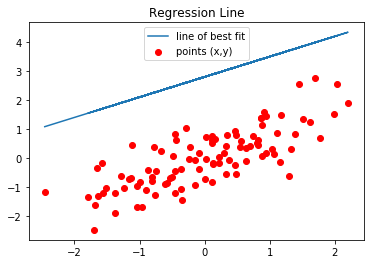

0.7737284998878209 2.830488393581382e-15
Error after Performing Gradient Descent : 0.401344208461338


In [31]:
def start():
    data = genfromtxt(path.join('data.csv'),delimiter=',')
    data = featureNormalize(data)
    initial_m = 0
    initial_b = 0
    error=compute_error(data,initial_m,initial_b)
    print("Error @ inital stage : {}".format(error))
    (m,b,m_array,b_array)=perform_gradient_descent(data,initial_m,initial_b,0.01,2000)
    #print('gradient ',m,b)0
    N=len(m_array)
    e_array=[]   
    error=compute_error(data,m,b)
    print(m,b)
    print("Error after Performing Gradient Descent : {}".format(error))

start()

### With L2 Normalization

mean  [48.95834146 72.73505055]
std [ 9.69752496 16.57468719]
Error @ inital stage : 0.9999999999999996
Running 0/2000
Running 100/2000
Running 200/2000
Running 300/2000
Running 400/2000
Running 500/2000
Running 600/2000
Running 700/2000
Running 800/2000
Running 900/2000
Running 1000/2000
Running 1100/2000
Running 1200/2000
Running 1300/2000
Running 1400/2000
Running 1500/2000
Running 1600/2000
Running 1700/2000
Running 1800/2000
Running 1900/2000


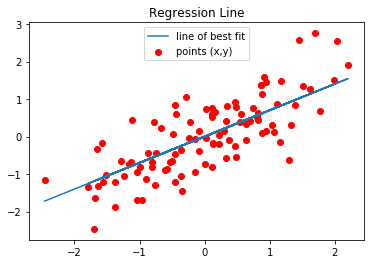

0.7447907429053715 -0.028937756982451202
Error after Performing Gradient Descent : 0.40301899601968894


In [35]:
def start():
    data = genfromtxt(path.join('data.csv'),delimiter=',')
    data = featureNormalize(data)
    initial_m = 0
    initial_b = 0
    error=compute_error(data,initial_m,initial_b)
    print("Error @ inital stage : {}".format(error))
    (m,b,m_array,b_array)=perform_gradient_descent_reg(data,initial_m,initial_b,0.01,2000)
    #print('gradient ',m,b)0
    N=len(m_array)
    e_array=[]   
    error=compute_error(data,m,b)
    print(m,b)
    print("Error after Performing Gradient Descent : {}".format(error))

start()

### Normal Equation
we will find $w_{\theta}$ and $b_{\theta}$ by using <b>Normal Equation</b> . 
$$X\theta = \overline{Y} $$
Taking conjugate on both sides .
$$
\begin{align} 
X_T X \theta &= X_T \overline{Y} \\
\theta &= (X_T X)^{-1} X_T \overline{Y}
\end{align}
$$

In [183]:
def normalEqn(X,y):
    #X = np.array(data[:,0])
    #y = np.array(data[:,1])
    #print( X , Y )
    #theta = np.zeros(data.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta
    

In [184]:
def init():
    data = np.loadtxt('ex1data2.txt' , delimiter=',')
    X = data[:, :2]
    y = data[:, 2]
    m = y.size
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    theta = normalEqn(X,y)
    print('theta ',theta)

init()

theta  [89597.9095428    139.21067402 -8738.01911233]


# Conclusion :
Thanks to the `batch-gradient-descent`,<br>
We could see that blue line i.e `line-of-best-fit` covered almost all the points.<br>
Also we could see the values descended from highest value to Lowest value meaning that our error got reduced over time which forms a `valley` and the minimum value is our `minima`